In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv("data_processed.csv")
data

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,female,United States,No,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,male,United States,No,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,male,Canada,No,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,male,United Kingdom,No,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,male,United States,No,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,2015-09-12 11:17:21,26,male,United Kingdom,No,No,Yes,Sometimes,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1215,2015-09-26 01:07:35,32,male,United States,No,Yes,Yes,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1216,2015-11-07 12:36:58,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1217,2015-11-30 21:25:06,46,female,United States,No,No,No,Sometimes,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [3]:
sns.set(style='whitegrid')

Посмотрим на распределение возраста у опрошенных

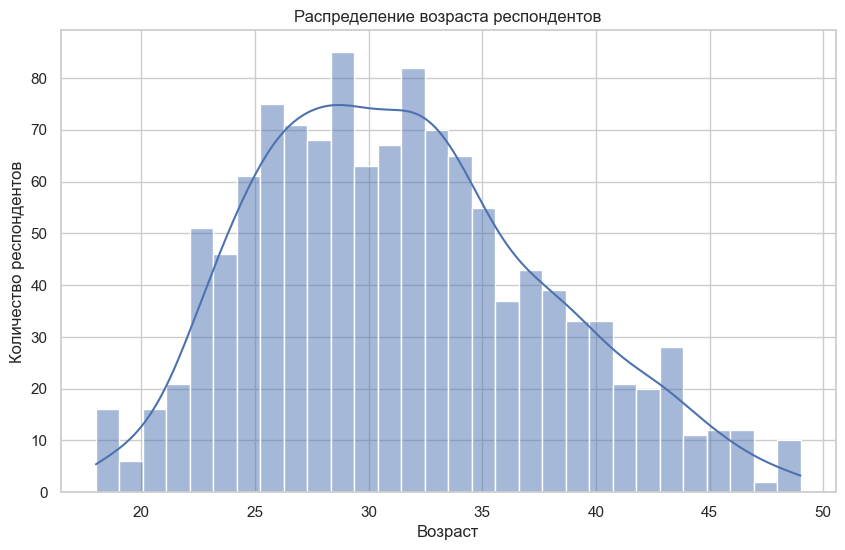

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Распределение возраста респондентов')
plt.xlabel('Возраст')
plt.ylabel('Количество респондентов')
plt.show()

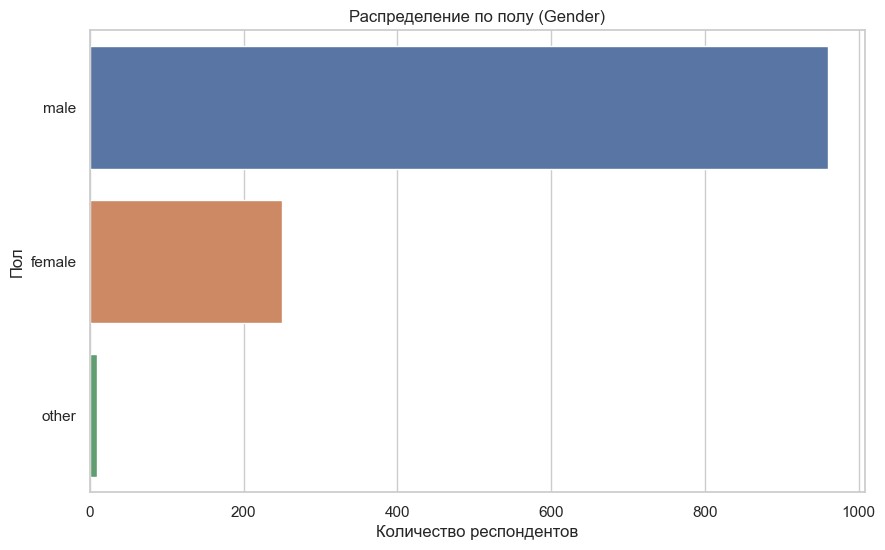

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Gender', data=data, order=data['Gender'].value_counts().index)
plt.title('Распределение по полу (Gender)')
plt.xlabel('Количество респондентов')
plt.ylabel('Пол')
plt.show()

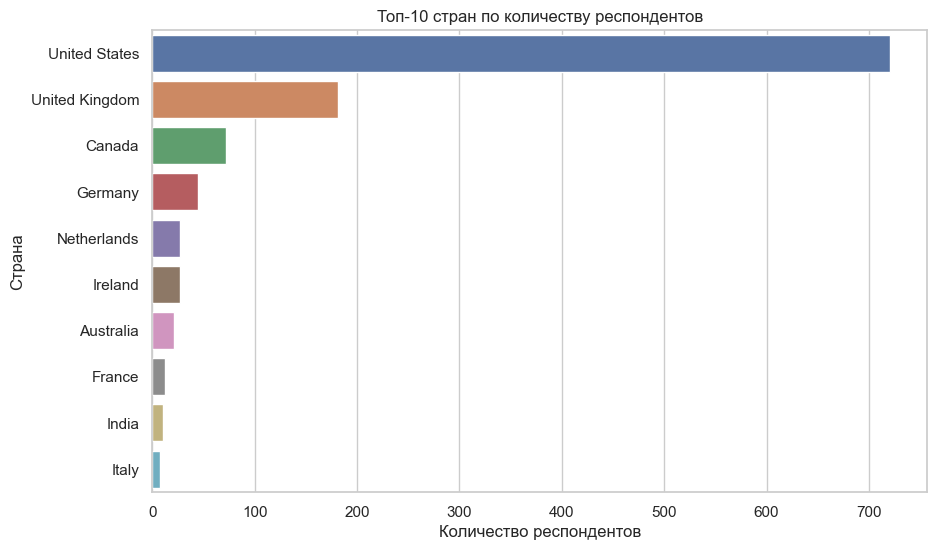

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Country', data=data, order=data['Country'].value_counts().index[:10])
plt.title('Топ-10 стран по количеству респондентов')
plt.xlabel('Количество респондентов')
plt.ylabel('Страна')
plt.show()

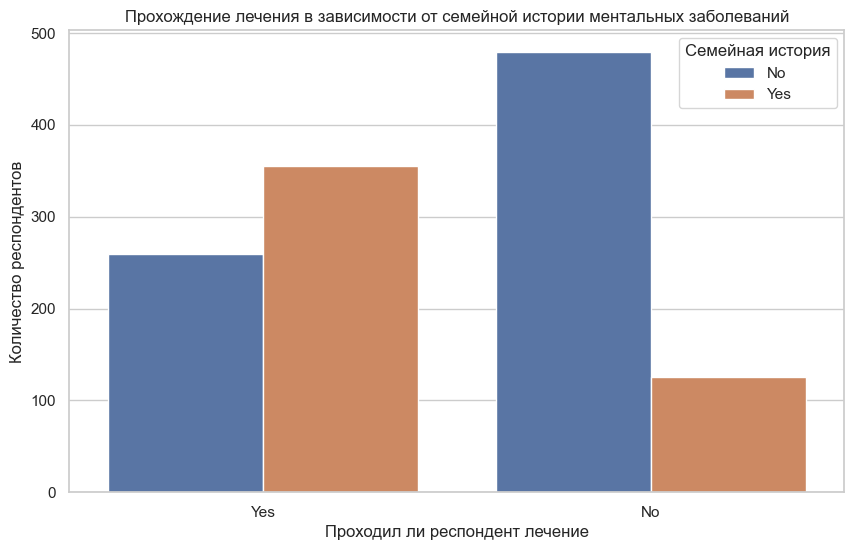

In [7]:
# Анализ зависимости прохождения лечения от семейной истории ментальных заболеваний
plt.figure(figsize=(10, 6))
sns.countplot(x='treatment', hue='family_history', data=data)
plt.title('Прохождение лечения в зависимости от семейной истории ментальных заболеваний')
plt.xlabel('Проходил ли респондент лечение')
plt.ylabel('Количество респондентов')
plt.legend(title='Семейная история')
plt.show()

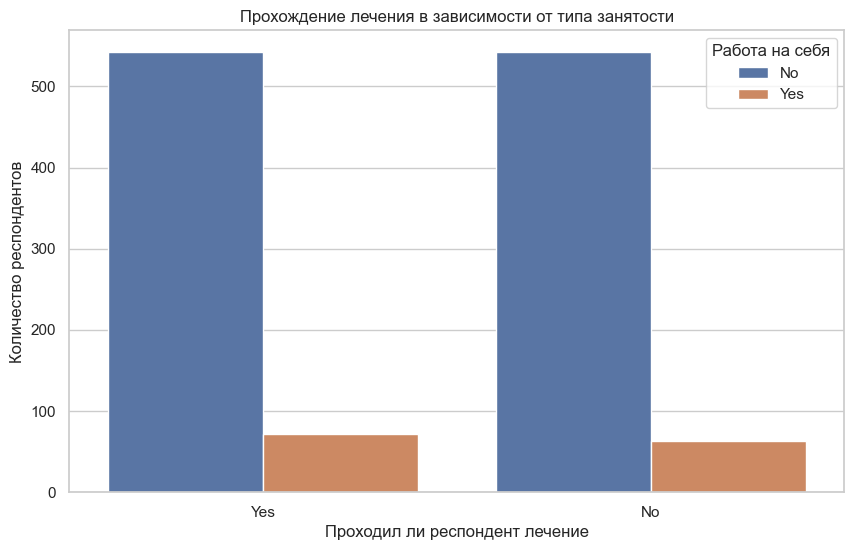

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='treatment', hue='self_employed', data=data, order=['Yes', 'No'])
plt.title('Прохождение лечения в зависимости от типа занятости')
plt.xlabel('Проходил ли респондент лечение')
plt.ylabel('Количество респондентов')
plt.legend(title='Работа на себя')
plt.show()

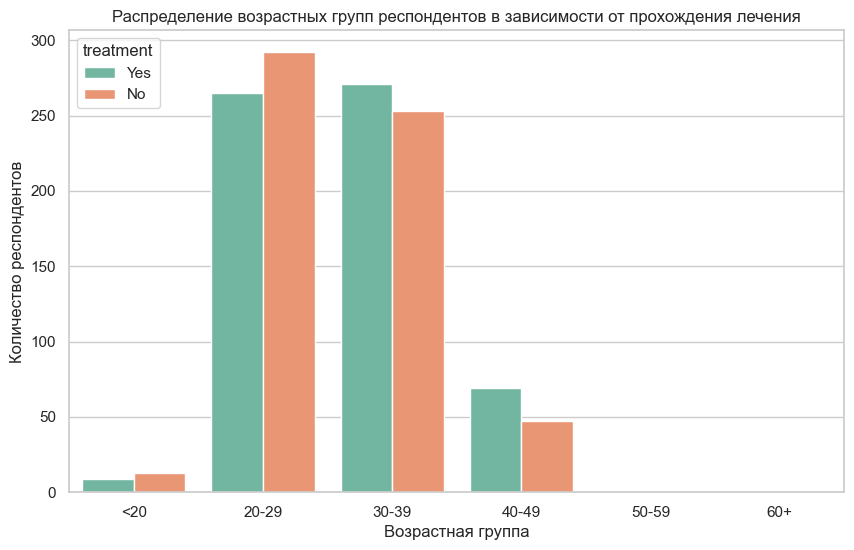

In [9]:
data['age_group'] = pd.cut(data['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['<20', '20-29', '30-39', '40-49', '50-59', '60+'])

# Построим гистограмму распределения возрастных групп в зависимости от прохождения лечения
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='age_group', hue='treatment', palette='Set2')
plt.title('Распределение возрастных групп респондентов в зависимости от прохождения лечения')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество респондентов')
plt.show()

In [10]:
def convert_to_numeric(value):
    if '-' in value:
        lower, upper = map(int, value.split('-'))
        return (lower + upper) / 2
    elif value == 'More than 1000':
        return 1001  
    else:
        return int(value)

data['no_employees_numeric'] = data['no_employees'].apply(convert_to_numeric)

print(data)

                Timestamp  Age  Gender         Country self_employed  \
0     2014-08-27 11:29:31   37  female   United States            No   
1     2014-08-27 11:29:37   44    male   United States            No   
2     2014-08-27 11:29:44   32    male          Canada            No   
3     2014-08-27 11:29:46   31    male  United Kingdom            No   
4     2014-08-27 11:30:22   31    male   United States            No   
...                   ...  ...     ...             ...           ...   
1214  2015-09-12 11:17:21   26    male  United Kingdom            No   
1215  2015-09-26 01:07:35   32    male   United States            No   
1216  2015-11-07 12:36:58   34    male   United States            No   
1217  2015-11-30 21:25:06   46  female   United States            No   
1218  2016-02-01 23:04:31   25    male   United States            No   

     family_history treatment work_interfere    no_employees remote_work  ...  \
0                No       Yes          Often          

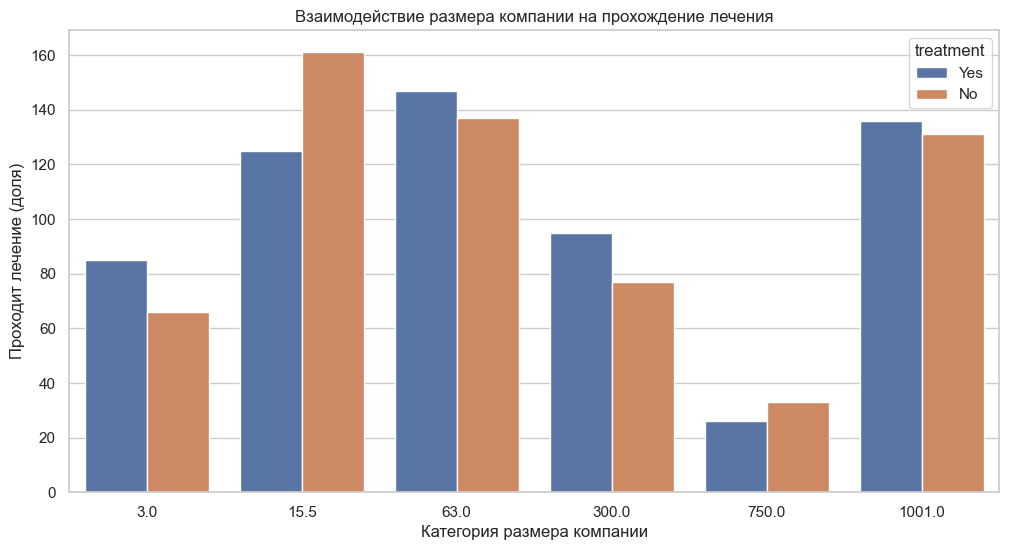

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='no_employees_numeric', hue='treatment', capsize=.1)
plt.title('Взаимодействие размера компании на прохождение лечения')
plt.xlabel('Категория размера компании')
plt.ylabel('Проходит лечение (доля)')
plt.show()

In [12]:
data['no_employees'].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Timestamp                  1219 non-null   object  
 1   Age                        1219 non-null   int64   
 2   Gender                     1219 non-null   object  
 3   Country                    1219 non-null   object  
 4   self_employed              1219 non-null   object  
 5   family_history             1219 non-null   object  
 6   treatment                  1219 non-null   object  
 7   work_interfere             1219 non-null   object  
 8   no_employees               1219 non-null   object  
 9   remote_work                1219 non-null   object  
 10  tech_company               1219 non-null   object  
 11  benefits                   1219 non-null   object  
 12  care_options               1219 non-null   object  
 13  wellness_program           1219 n

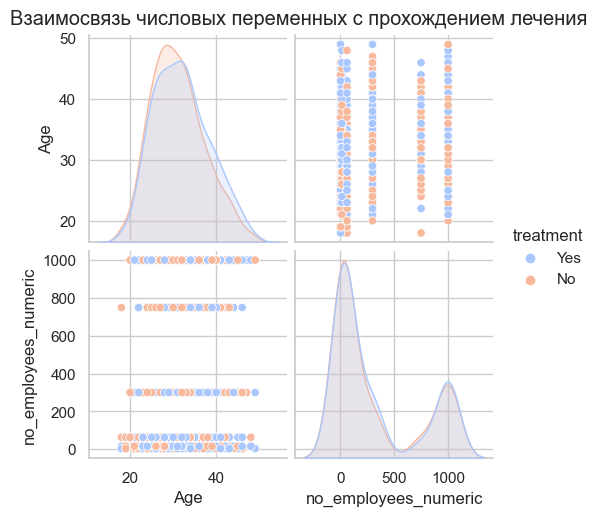

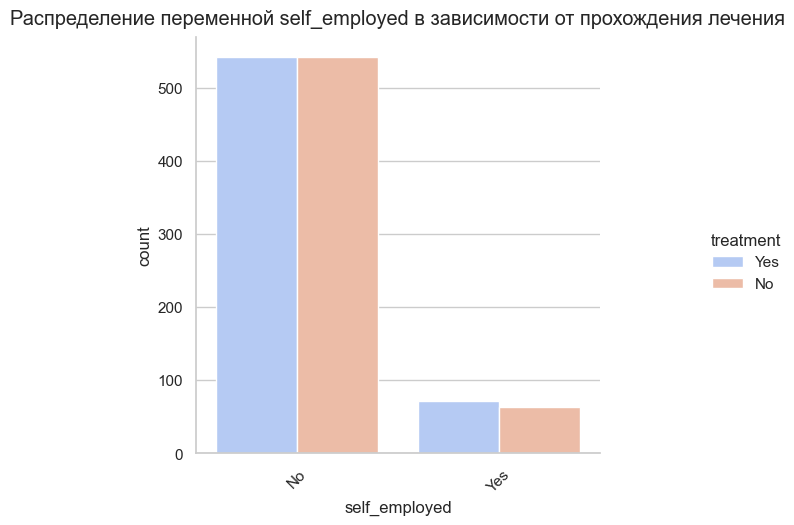

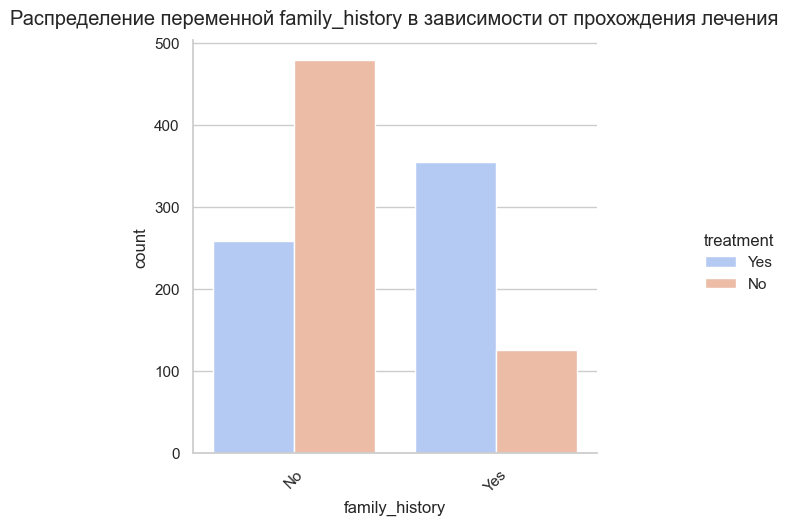

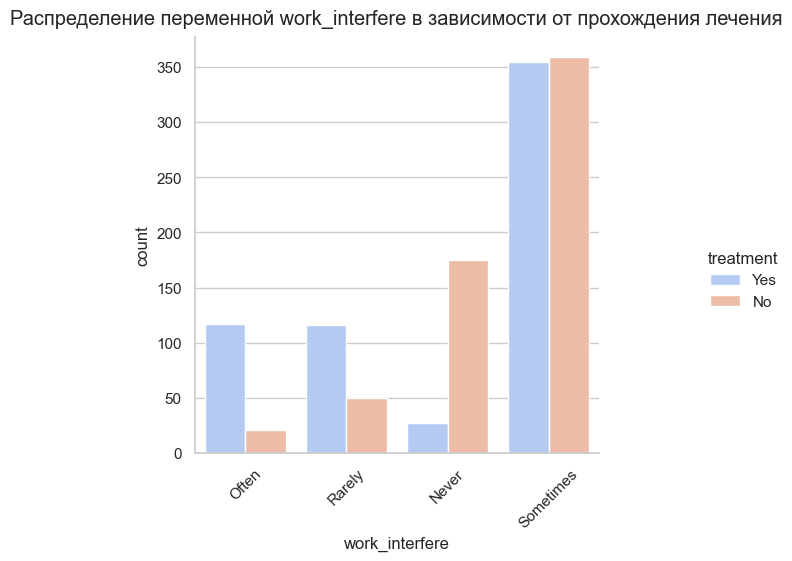

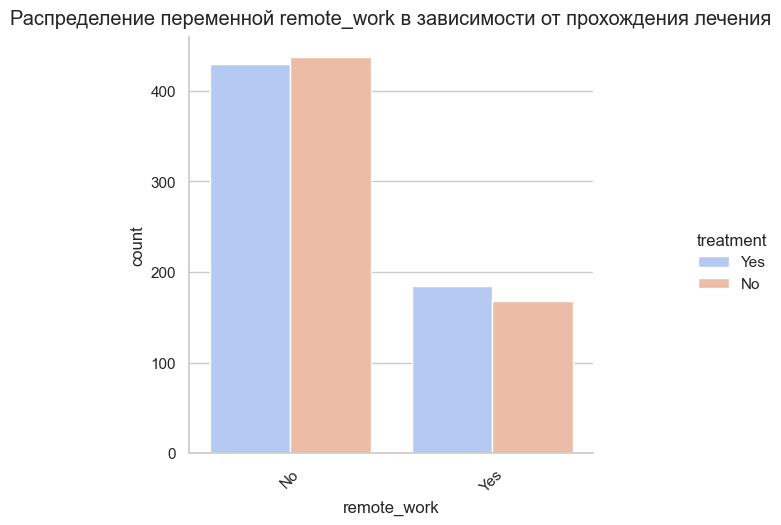

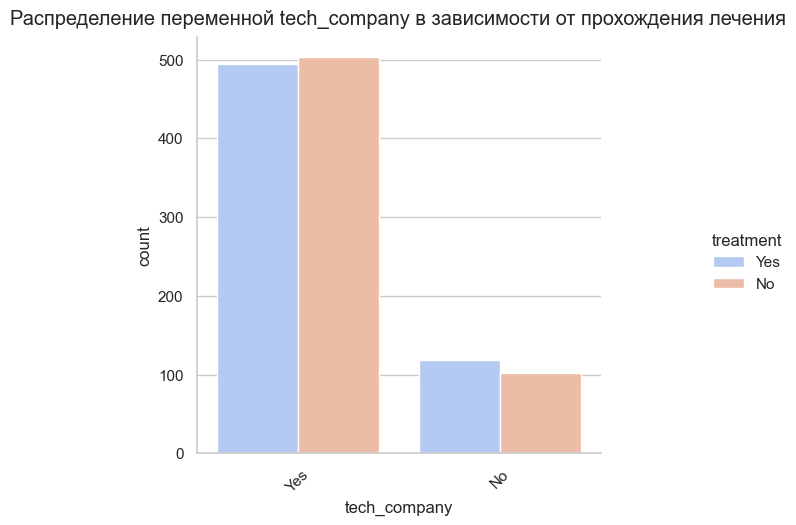

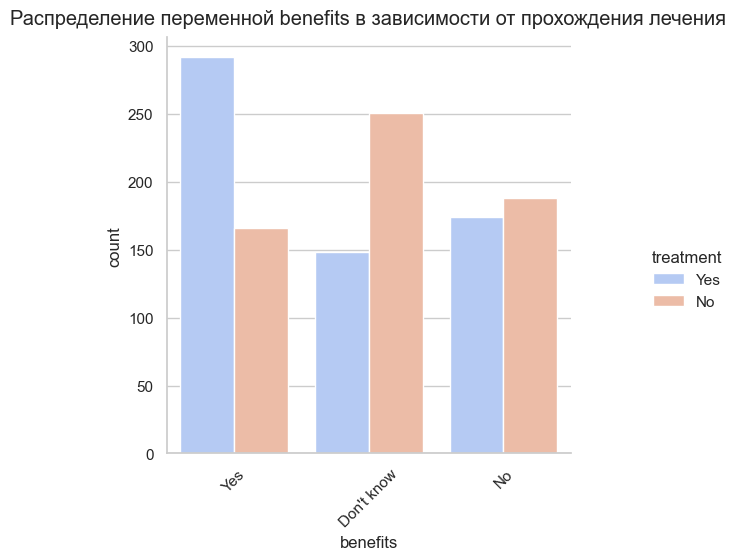

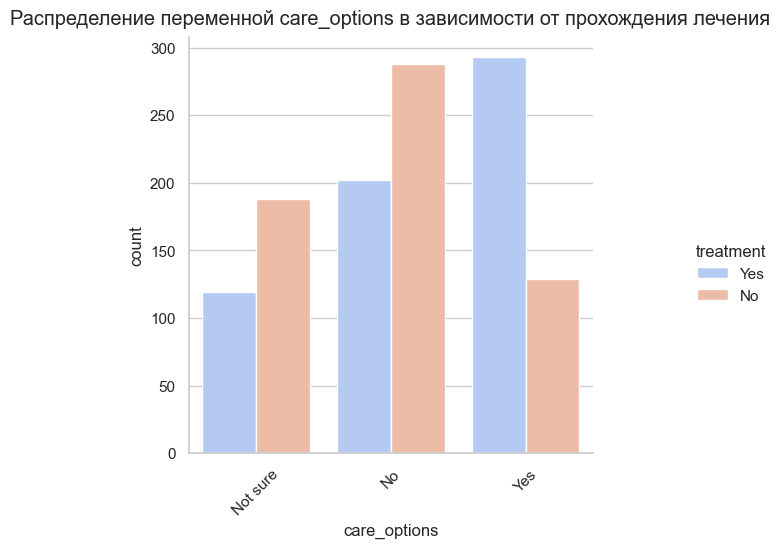

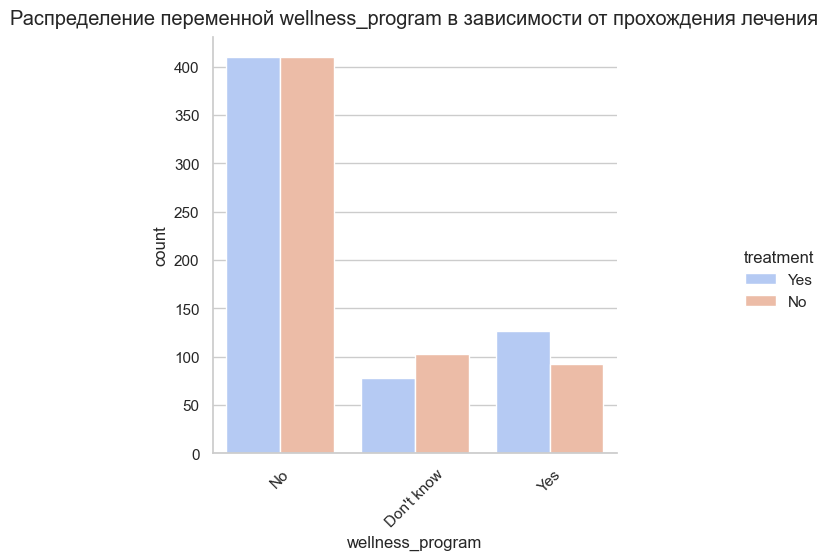

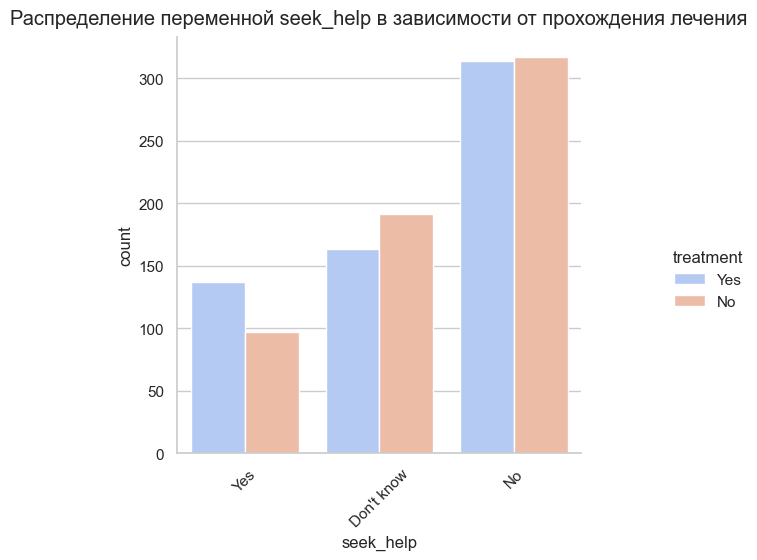

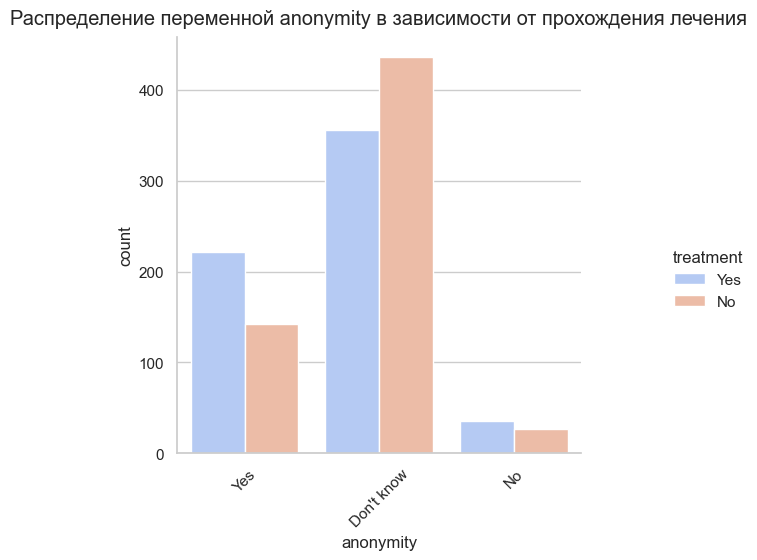

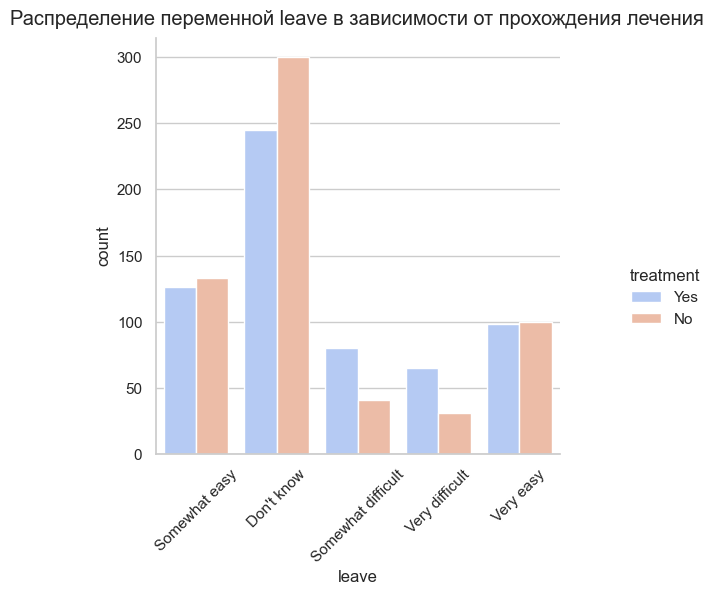

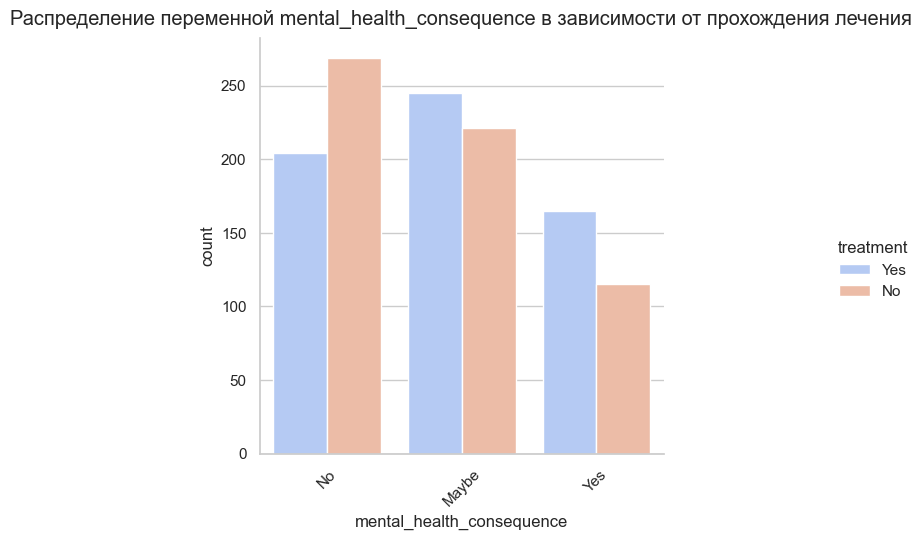

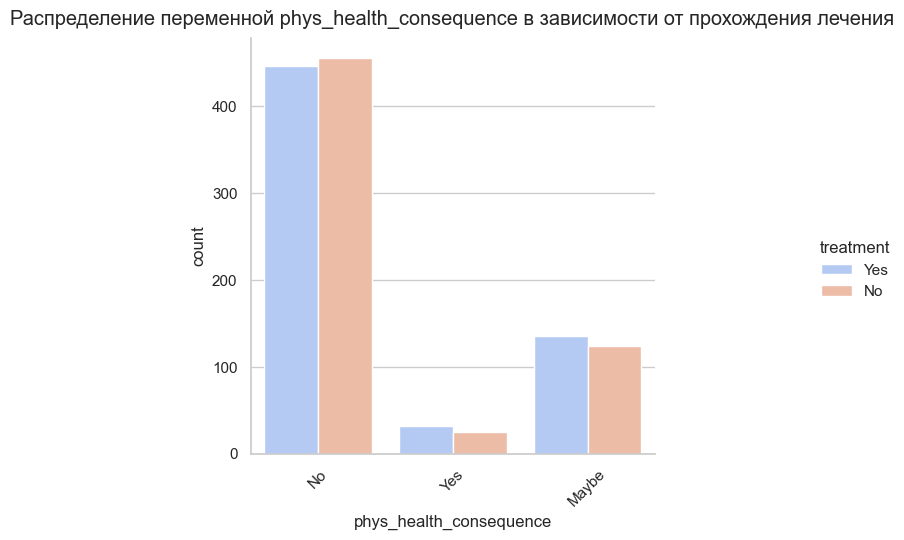

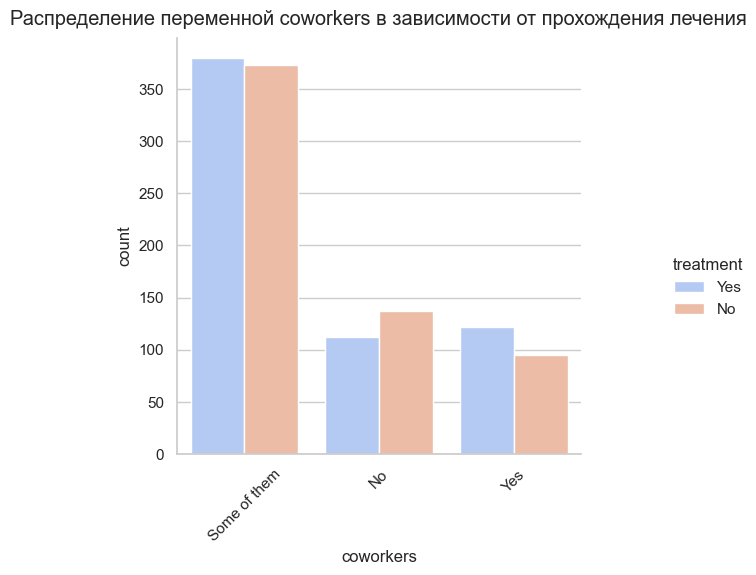

In [ ]:
# Pairplot for numerical variables
sns.pairplot(data, hue='treatment', vars=['Age', 'no_employees_numeric'], palette='coolwarm')
plt.suptitle('Взаимосвязь числовых переменных с прохождением лечения', y=1.02)
plt.show()

# 2. FacetGrid for categorical variables
categorical_vars = ['self_employed', 'family_history', 'work_interfere', 'remote_work', 
                    'tech_company', 'benefits', 'care_options', 'wellness_program', 
                    'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 
                    'phys_health_consequence', 'coworkers', 'supervisor', 
                    'mental_health_interview', 'phys_health_interview', 
                    'mental_vs_physical', 'obs_consequence']

for var in categorical_vars:
    g = sns.catplot(x=var, hue='treatment', data=data, kind='count', palette='coolwarm')
    g.fig.suptitle(f'Распределение переменной {var} в зависимости от прохождения лечения', y=1.02)
    plt.xticks(rotation=45)
    plt.show()

# Результаты визуализации

### Наибольшее влияние на прохождение лечения влияют такие признаки как:
1. Наличие семейной истории. Люди, у которых есть семейная история психических заболеваний, значительно чаще проходят лечение.
2. Наличие профессиональной помощи. Люди, у которых есть доступ к возможностям профессиональной помощи на работе, чаще выбирают лечение, так как это снижает барьеры и делает процесс обращения за помощью менее сложным.
3. Вмешательство работы в личную жизнь. Если работа часто мешает личной жизни, это может стать причиной повышенного стресса и усталости, что приводит к более высокой вероятности обращения за лечением.
4. Доступность льгот. Наличие медицинских и других льгот на работе, таких как страхование или программы поддержки психического здоровья, существенно повышает вероятность того, что человек обратится за лечением.
5. Размер компании. В небольших компаниях сотрудники реже обращаются за лечением, тогда как в средних и крупных компаниях доступ к льготам и поддержке повышает вероятность прохождения лечения.